In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
product = pd.read_csv("product.csv")
product.head()

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0


In [4]:
product.shape

(8471220, 8)

In [5]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   order_id      object
 1   user_id       object
 2   page_id       object
 3   product       object
 4   site_version  object
 5   time          object
 6   title         object
 7   target        int64 
dtypes: int64(1), object(7)
memory usage: 517.0+ MB


In [6]:
for col in product.columns: 
  unique_vals = product[col].unique()
  len_unique_vals = len(unique_vals)

In [10]:
for col in product.columns:
    unique_vals = product[col].unique()
    len_unique_vals = len(unique_vals)
    print(col)
    print("Number of unique values = {}: {}".format(len_unique_vals, unique_vals[:10]))
    print("".center(30, "="))
    print('\n')


order_id
Number of unique values = 8471220: ['cfcd208495d565ef66e7dff9f98764da' 'c4ca4238a0b923820dcc509a6f75849b'
 'c81e728d9d4c2f636f067f89cc14862c' 'eccbc87e4b5ce2fe28308fd9f2a7baf3'
 'a87ff679a2f3e71d9181a67b7542122c' 'e4da3b7fbbce2345d7772b0674a318d5'
 '1679091c5a880faf6fb5e6087eb1b2dc' '8f14e45fceea167a5a36dedd4bea2543'
 'c9f0f895fb98ab9159f51fd0297e236d' '45c48cce2e2d7fbdea1afc51c7c6ad26']


user_id
Number of unique values = 4254619: ['c81e728d9d4c2f636f067f89cc14862c' 'eccbc87e4b5ce2fe28308fd9f2a7baf3'
 'a87ff679a2f3e71d9181a67b7542122c' 'e4da3b7fbbce2345d7772b0674a318d5'
 '1679091c5a880faf6fb5e6087eb1b2dc' '8f14e45fceea167a5a36dedd4bea2543'
 'c9f0f895fb98ab9159f51fd0297e236d' '45c48cce2e2d7fbdea1afc51c7c6ad26'
 'd3d9446802a44259755d38e6d163e820' '6512bd43d9caa6e02c990b0a82652dca']


page_id
Number of unique values = 7393316: ['6f4922f45568161a8cdf4ad2299f6d23' '4e732ced3463d06de0ca9a15b6153677'
 '5c45a86277b8bf17bff6011be5cfb1b9' 'fb339ad311d50a229e497085aad219c7'
 '182be0c5cd

In [11]:
columns_to_drop = ['page_id']
product = product.drop(columns=columns_to_drop)
product.head()

,order_id,user_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0


In [12]:
product.isnull().sum()

order_id        0
user_id         0
product         0
site_version    0
time            0
title           0
target          0
dtype: int64

In [13]:
print("Number of duplicates: {}".format(product.duplicated().sum()))

Number of duplicates: 0


In [15]:
print("Time column dtype before: {}".format(product['time'].dtype))
product['time'] = pd.to_datetime(product['time']) 
print("Time column dtype after: {}".format(product['time'].dtype))

Time column dtype before: datetime64[ns]
Time column dtype after: datetime64[ns]


In [16]:
product['title'] = product['title'].str.replace('banner_click', 'click') 
product['title'] = product['title'].str.replace('banner_show', 'show') 
product.head()

,order_id,user_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,click,0


In [17]:
# Feature Engineering(Extract days, months, year, hours, date from time column)
product['day'] = product['time'].dt.weekday
product['month'] = product['time'].dt.month
product['hour'] = product['time'].dt.hour
product['date'] = product['time'].dt.date

product.head()

,order_id,user_id,product,site_version,time,title,target,day,month,hour,date
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,click,0,4,1,9,2019-01-11
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,show,0,2,1,9,2019-01-09
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,show,0,2,1,9,2019-01-09
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,show,0,3,1,8,2019-01-03
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,click,0,3,1,8,2019-01-03


In [18]:
product.describe(include='all')

,order_id,user_id,product,site_version,time,title,target,day,month,hour,date
count,8471220,8471220,8471220,8471220,8471220,8471220,8.471220e+06,8.471220e+06,8.471220e+06,8.471220e+06,8471220
unique,8471220,4254619,5,2,5799549,3,NaN,NaN,NaN,NaN,151
top,cfcd208495d565ef66e7dff9f98764da,6e1d9fca53a19d4f105947348fd1d627,clothes,mobile,2019-02-04 10:32:05,show,NaN,NaN,NaN,NaN,2019-05-20
freq,1,23,1786438,6088335,10,7393314,NaN,NaN,NaN,NaN,80025
first,NaN,NaN,NaN,NaN,2019-01-01 00:00:03,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-05-31 23:59:58,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.936082e-02,2.986464e+00,3.239505e+00,1.236124e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.688158e-01,1.989171e+00,1.421114e+00,5.422469e+00,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00,NaN


Comment:

4254619 unique user_id -> One user_id can have many titles (banner_click, banner_show, banner_purchase) & interact with many banners overtime.

5 unique product, 2 site version, 3 title.

Target ratio = 0.029 = 2.9% -> Purchase rate is low -> Imbalance target data

Time range: 2019-01-01 to 2019-05-31 (yyyy-mm-dd)

# Univariate Analysis

In [20]:
def get_proportion(dataframe, feature):
    count_unique_values = dataframe[feature].value_counts(sort=True, ascending=False)
    ratio_unique_values = round(dataframe[feature].value_counts(sort=True, ascending=False) * 100 / dataframe.shape[0], 2)
    return count_unique_values, ratio_unique_values

def plot_bar(x, y, title, x_label, y_label, color_palette=None, horizontal=False, figsize=(14, 5)):
    """
    This function plots a vertical (or horizontal) bar chart.
    """
    fig, ax = plt.subplots(figsize=figsize)
    if horizontal:
        ax.barh(y, x, color=color_palette)
        for p in ax.patches:
            ax.annotate(f'{p.get_width():.2f}%', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
                        va='center', ha='left')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
    else:
        ax.bar(y, x, color=color_palette)
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height() + 0.1),
                        va='bottom', ha='center')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
    
    ax.set_title(title)
    plt.show()

product
Count by product:
clothes             1786438
company             1725056
sneakers            1703342
sports_nutrition    1634625
accessories         1621759
Name: product, dtype: int64
Ratio by product:
clothes             21.09
company             20.36
sneakers            20.11
sports_nutrition    19.30
accessories         19.14
Name: product, dtype: float64


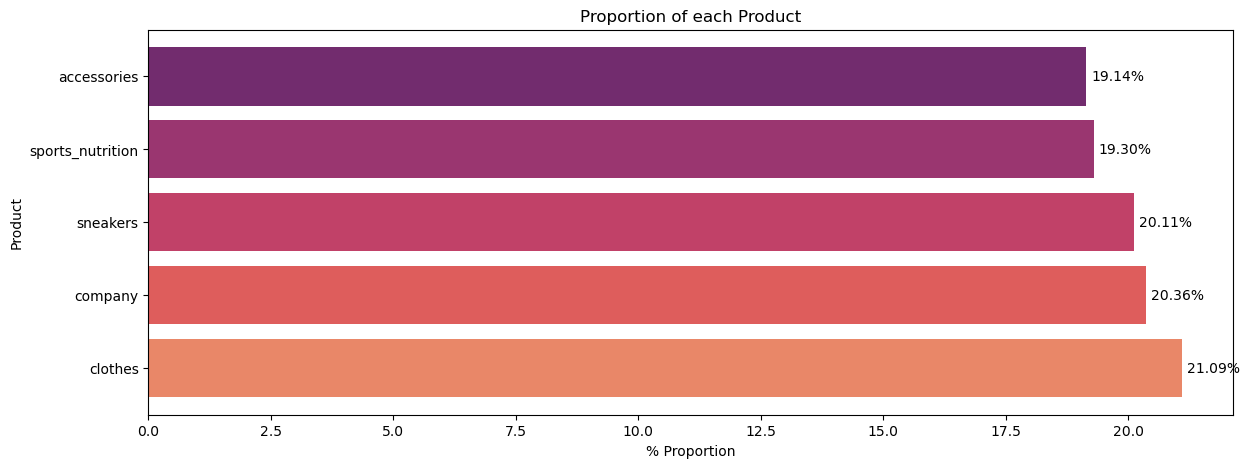



site_version
Count by site_version:
mobile     6088335
desktop    2382885
Name: site_version, dtype: int64
Ratio by site_version:
mobile     71.87
desktop    28.13
Name: site_version, dtype: float64


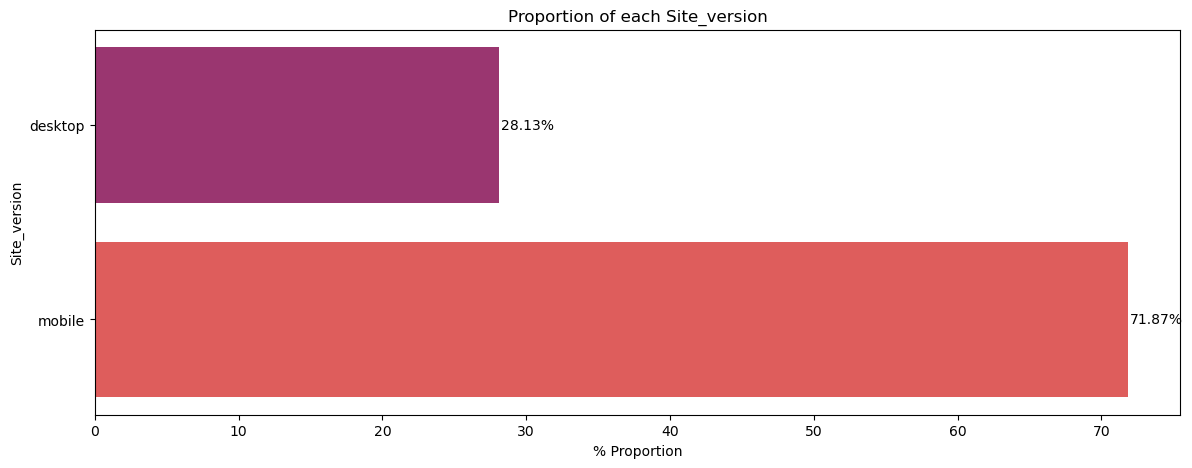



title
Count by title:
show     7393314
click     829184
order     248722
Name: title, dtype: int64
Ratio by title:
show     87.28
click     9.79
order     2.94
Name: title, dtype: float64


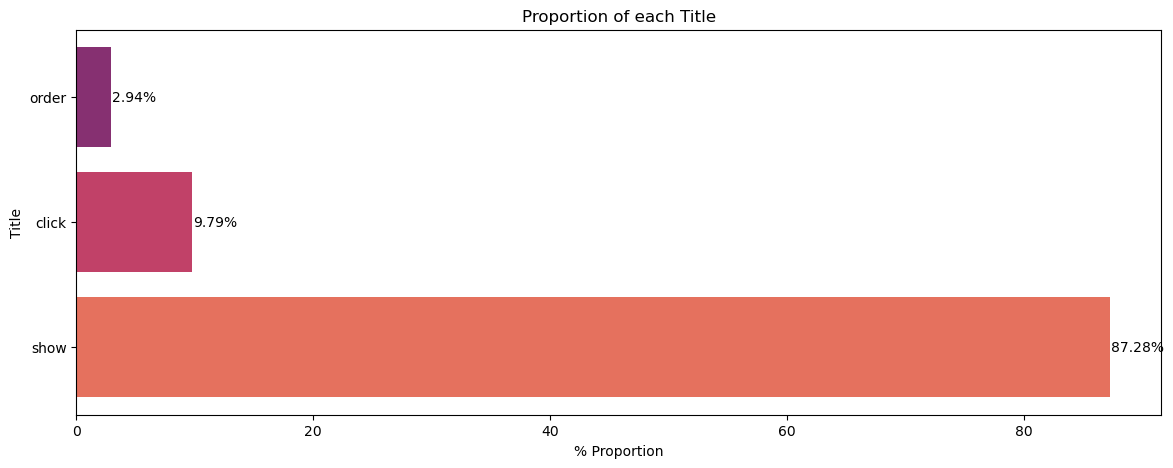



target
Count by target:
0    8222498
1     248722
Name: target, dtype: int64
Ratio by target:
0    97.06
1     2.94
Name: target, dtype: float64


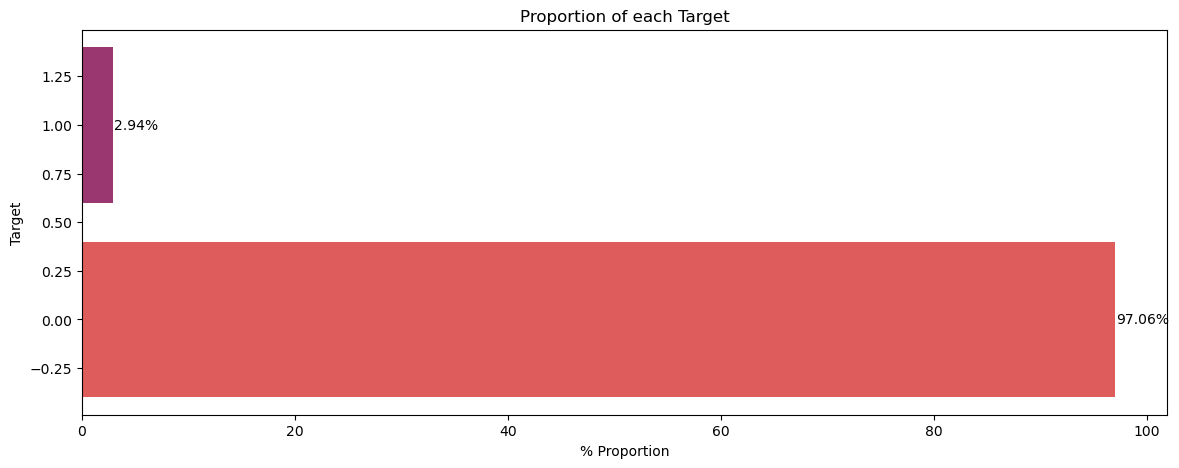

In [21]:
univariate_analyze_columns = ['product', 'site_version', 'title', 'target']

for col in univariate_analyze_columns:
  print(col)
  
  count_unique_values, ratio_unique_values = get_proportion(product, col)
  print("Count by {}:".format(col))
  print(count_unique_values)
  print("".center(30, "="))
  print("Ratio by {}:".format(col))
  print(ratio_unique_values)

  # Plot bar chart
  palette = sns.color_palette("flare", n_colors=len(ratio_unique_values.index)) # Define palette
  plot_bar(
      x = ratio_unique_values.values,
      y = ratio_unique_values.index,
      title='Proportion of each {}'.format(col.capitalize()), 
      x_label='% Proportion',
      y_label=col.capitalize(),
      color_palette = palette, 
      horizontal=True
  )
  print("\n")

Comment:

Each product accounts for 19% - 20% of total data -> balance

More than 71% users prefer using mobile phone than desktop (only 28%)

Nearly 3% of users actually have an order, click rate is nearly 10%.

# Bivariate Analysis

Which product has the highest conversion rate?

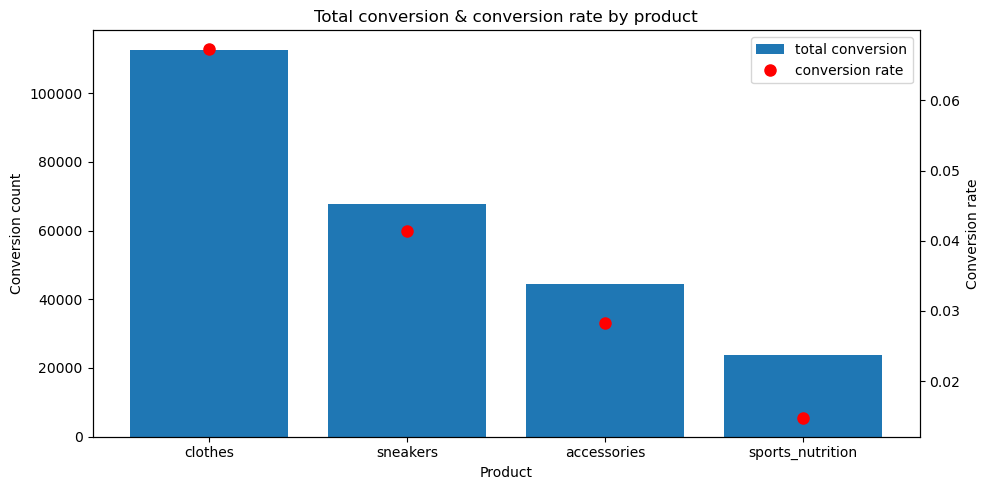

Conversion rate by product:


,order_id
product,
clothes,0.067344
sneakers,0.041403
accessories,0.028247
sports_nutrition,0.014735


In [23]:
conversion_count_by_product = product[product['target'] == 1].groupby('product')['order_id'].count().sort_values(ascending=False) # Count total conversion for each product
visit_count_by_product = product[product['target'] == 0].groupby('product')['order_id'].count().drop('company').loc[conversion_count_by_product.index] # Count total visit for each product
conversion_rate_by_product = conversion_count_by_product/visit_count_by_product 

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(conversion_count_by_product.index, conversion_count_by_product.values, label='total conversion') # Plot total conversion
ax1.set_title('Total conversion & conversion rate by product')
ax1.set_ylabel('Conversion count')
ax1.set_xlabel('Product')

ax2 = ax1.twinx()
ax2.plot(conversion_rate_by_product.index, conversion_rate_by_product.values, color='r', marker='o', markersize=8, linestyle="None", label='conversion rate') 
ax2.set_ylabel('Conversion rate')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()
 
print("".center(50, "="))
print("Conversion rate by product:")
conversion_rate_by_product.sort_values(ascending=False).to_frame().style.background_gradient(cmap='Blues')

clothes and sneakers have highest conversion rate.

accessories and sport nutrition have low conversion rate.

Which site has the highest conversion rate?

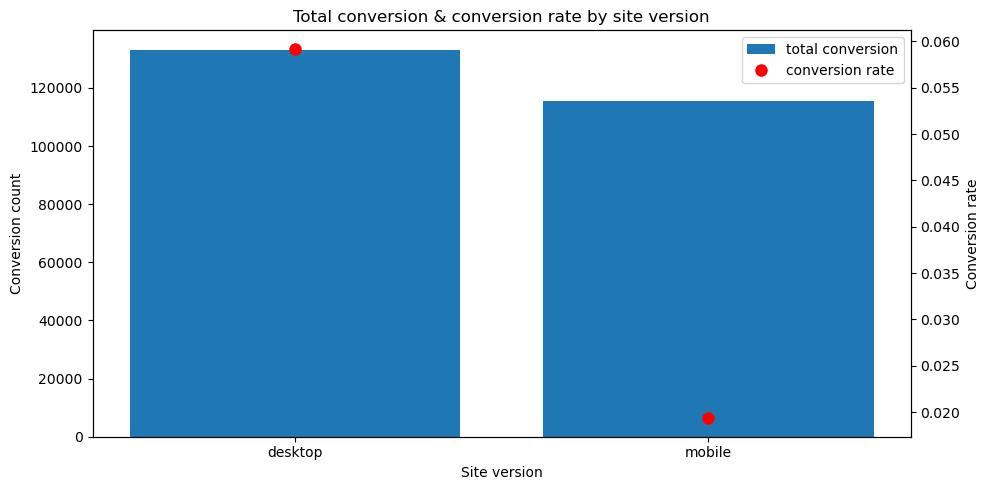

Conversion rate by site version:


,order_id
site_version,
desktop,0.059199
mobile,0.019345


In [24]:
conversion_count_by_site_version = product[product['target'] == 1].groupby('site_version')['order_id'].count().sort_values(ascending=False) # Count total conversion for each site_version
visit_count_by_site_version = product[product['target'] == 0].groupby('site_version')['order_id'].count().loc[conversion_count_by_site_version.index] # Count total visit for each site_version
conversion_rate_by_site_version = conversion_count_by_site_version/visit_count_by_site_version # Calculate conversion rate

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(conversion_count_by_site_version.index, conversion_count_by_site_version.values, label='total conversion') # Plot total conversion
ax1.set_title('Total conversion & conversion rate by site version')
ax1.set_ylabel('Conversion count')
ax1.set_xlabel('Site version')

ax2 = ax1.twinx() 
ax2.plot(conversion_rate_by_site_version.index, conversion_rate_by_site_version.values, color='r', marker='o', markersize=8, linestyle="None", label='conversion rate') 
ax2.set_ylabel('Conversion rate')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

print("".center(50, "="))
print("Conversion rate by site version:")
conversion_rate_by_site_version.sort_values(ascending=False).to_frame().style.background_gradient(cmap='Blues')

Which month has the highest conversion rate?

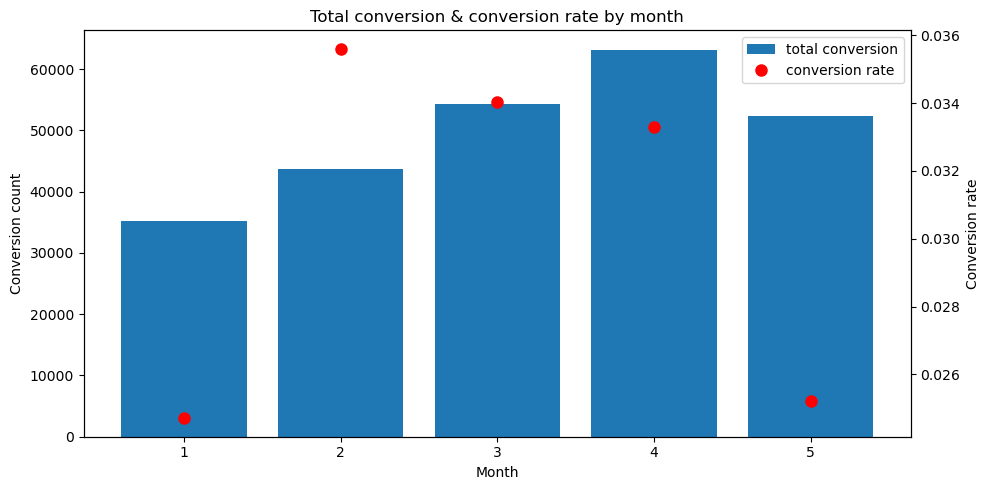

Conversion rate by month:


,order_id
month,
2,0.035599
3,0.034040
4,0.033296
5,0.025202
1,0.024706


In [25]:
conversion_count_by_month = product[product['target'] == 1].groupby('month')['order_id'].count().sort_values(ascending=False) # Count total conversion for each month
visit_count_by_month = product[product['target'] == 0].groupby('month')['order_id'].count().loc[conversion_count_by_month.index] # Count total visit for each month
conversion_rate_by_month = conversion_count_by_month/visit_count_by_month

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(conversion_count_by_month.index, conversion_count_by_month.values, label='total conversion') # Plot total conversion
ax1.set_title('Total conversion & conversion rate by month')
ax1.set_ylabel('Conversion count')
ax1.set_xlabel('Month')

ax2 = ax1.twinx()
ax2.plot(conversion_rate_by_month.index, conversion_rate_by_month.values, color='r', marker='o', markersize=8, linestyle="None", label='conversion rate') 
ax2.set_ylabel('Conversion rate')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

print("".center(50, "="))
print("Conversion rate by month:")
conversion_rate_by_month.sort_values(ascending=False).to_frame().style.background_gradient(cmap='Blues')


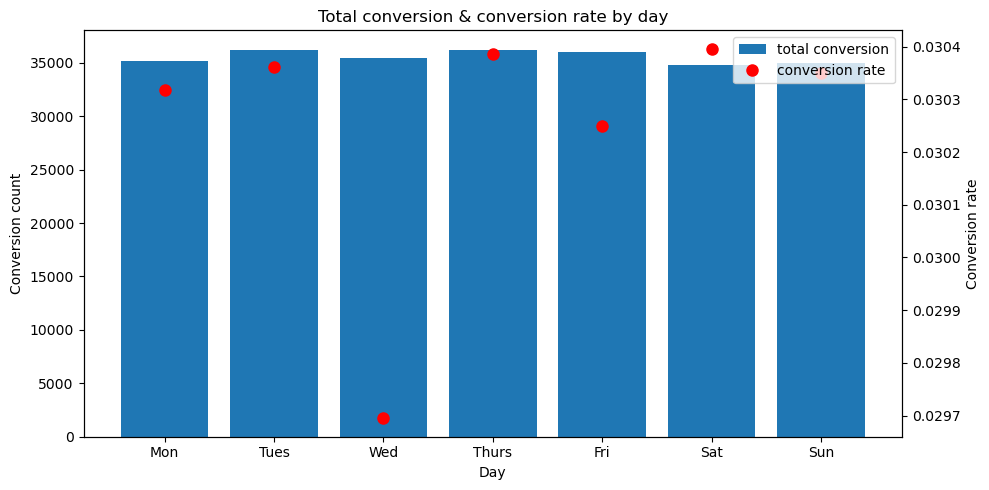

Conversion rate by day:


,order_id
day,
Sat,0.030396
Thurs,0.030385
Tues,0.030361
Sun,0.030350
Mon,0.030317
Fri,0.030249
Wed,0.029695


In [26]:
day_dict = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'}

conversion_count_by_day = product[product['target'] == 1].groupby('day')['order_id'].count().sort_values(ascending=False) # Count total conversion for each day
visit_count_by_day = product[product['target'] == 0].groupby('day')['order_id'].count().loc[conversion_count_by_day.index] # Count total visit for each day
conversion_rate_by_day = conversion_count_by_day/visit_count_by_day 

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(conversion_count_by_day.index, conversion_count_by_day.values, label='total conversion') # Plot total conversion
ax1.set_title('Total conversion & conversion rate by day')
ax1.set_ylabel('Conversion count')
ax1.set_xlabel('Day')

ax2 = ax1.twinx() 
ax2.plot(conversion_rate_by_day.index, conversion_rate_by_day.values, color='r', marker='o', markersize=8, linestyle="None", label='conversion rate') 
ax2.set_ylabel('Conversion rate')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.xticks(list(conversion_count_by_day.index), [day_dict[x] for x in list(conversion_count_by_day.index)])
plt.tight_layout()
plt.show()

print("".center(50, "="))
print("Conversion rate by day:")
conversion_rate_by_day.sort_values(ascending=False).to_frame().rename(index=day_dict).style.background_gradient(cmap='Blues')

Conversion rate trend by product?

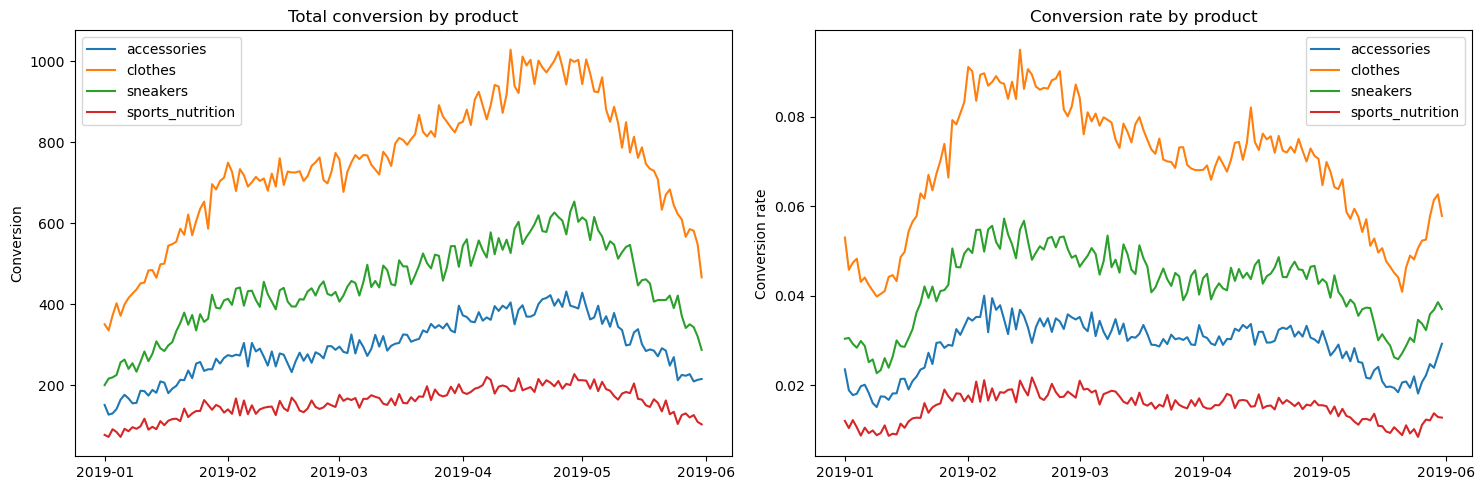

In [27]:
conversion_by_product_overtime = pd.pivot_table(
    data=product[product['target'] == 1],
    index='date',
    columns='product',
    values='order_id',
    aggfunc='count'
) # conversion count by product overtime

visit_by_product_overtime = pd.pivot_table(
    data=product[product['target'] == 0],
    index='date',
    columns='product',
    values='order_id',
    aggfunc='count'
).drop(columns='company') # visit count by product overtime

conversion_rate_by_product_overtime = conversion_by_product_overtime/visit_by_product_overtime # conversion rate by product overtime 

# Plot conversion trend 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(conversion_by_product_overtime) # Plot conversion count 
ax2.plot(conversion_rate_by_product_overtime) # Plot conversion rate

ax1.set_ylabel('Conversion')
ax2.set_ylabel('Conversion rate')

ax1.set_title('Total conversion by product')
ax2.set_title('Conversion rate by product')

ax1.legend(conversion_by_product_overtime.columns)
ax2.legend(conversion_rate_by_product_overtime.columns)

plt.tight_layout()
plt.show()


# Hypothesis Testing

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Is there a significant difference in conversion rate between each site version?

ANOVA table:
                  df    sum_sq   mean_sq          F    PR(>F)
C(site_version)  2.0  0.012356  0.006178  19.172414  0.002477
Residual         6.0  0.001933  0.000322        NaN       NaN


Post-hoc pairwise tukeyhsd analysis:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     A      B     0.02 0.4148 -0.025  0.065  False
     A      C   0.0867 0.0025 0.0417 0.1316   True
     B      C   0.0667 0.0093 0.0217 0.1116   True
--------------------------------------------------


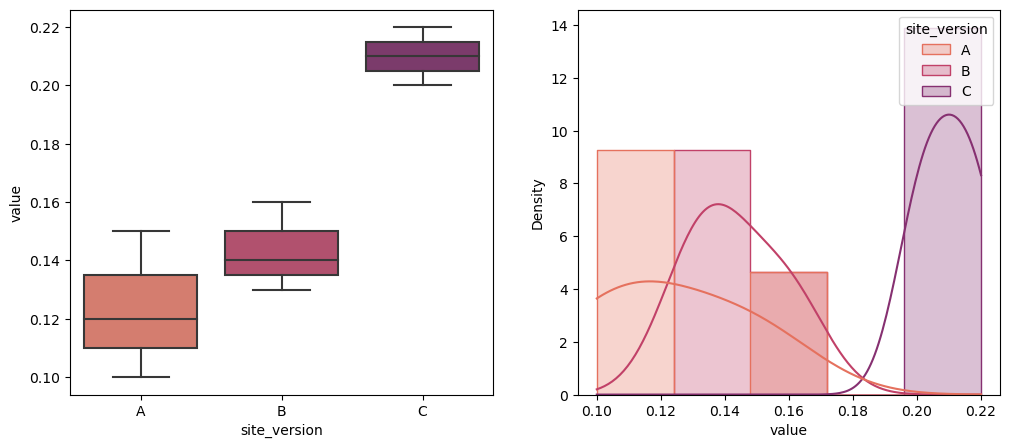

In [41]:
def anova_test_one_way(dataframe, feature, value_column, a=0.05):
    dataframe_melt = dataframe.melt(id_vars=[feature], value_vars=[value_column], var_name='variable', value_name='value')

    model = ols('value ~ C({})'.format(feature), data=dataframe_melt).fit()
    anova_table_type_1 = sm.stats.anova_lm(model, typ=1)

    print("ANOVA table:")
    print(anova_table_type_1)

    tukey = pairwise_tukeyhsd(endog=dataframe_melt['value'],
                              groups=dataframe_melt[feature],
                              alpha=a)
    print("\n\nPost-hoc pairwise tukeyhsd analysis:")
    print(tukey)

    # Visualizing 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(data=dataframe_melt, y='value', x=feature, palette='flare', ax=ax1)
    sns.histplot(dataframe_melt, x='value', hue=feature, kde=True, stat='density', alpha=0.3, element="step", palette='flare', ax=ax2)
    plt.show()

# Running the ANOVA test
anova_test_one_way(conversion_rate_by_site_version_overtime, 'site_version', 'conversion_rate')


P-value < 0.05 => There's a significant difference in coversion rate between desktop and mobile => desktop has much higher conversion rate!